want this form:

| id | year | yearstat | x1 | x2 |
| -- | ---- | -------- | -- | -- |
| 1  | 96   | 75       | 10 | 7  |
| 1  | 97   | 76       | 10 | 7  |
| 1  | 98   | 77       | 10 | 7  |
| 2  | 96   | 40       | 15 | 6  |
| 2  | 97   | 40.5     | 15 | 6  |
| 2  | 98   | 41       | 15 | 6  |
| 3  | 96   | 45       | 20 | 5  |
| 3  | 97   | 45.4     | 20 | 5  |
| 3  | 98   | 45.8     | 20 | 5  |

In [5]:
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv("mock/dummy_data.csv")
df_cols = df.columns
year_cols = df_cols[1:4]
print(year_cols)
df

Index(['year96', 'year97', 'year98'], dtype='object')


,id,year96,year97,year98,x1,x2
0,1,75,76.0,77.0,10,7
1,2,40,40.5,41.0,15,6
2,3,45,45.4,45.8,20,5


In [52]:
# construct df in panel data format
panel_frames = []
for ind, year in enumerate(year_cols):
    year_df = pd.DataFrame(df.loc[:,["id", "x1", "x2"]])
    year_df["year"] = [year_cols[ind][-2:] for _ in range(len(df))]
    year_df["year_stat"] = df.loc[:,year_cols[ind]] 
    # print(year_df)
    panel_frames.append(year_df)
panel_df = pd.concat(panel_frames)#, ignore_index=True)
panel_df = panel_df.sort_values(by=["id"], axis=0, ascending=True).reset_index(drop=True)
print(panel_df)

,id,x1,x2,year,year_stat
0,1,10,7,96,75.0
1,1,10,7,97,76.0
2,1,10,7,98,77.0
3,2,15,6,96,40.0
4,2,15,6,97,40.5
5,2,15,6,98,41.0
6,3,20,5,96,45.0
7,3,20,5,97,45.4
8,3,20,5,98,45.8


In [53]:
#resort cols s.t. year and year_stat come first
cols = panel_df.columns.tolist()
cols = cols[0:1] + cols[-2:] + cols[1:-2]
panel_df = panel_df[cols]
panel_df

['id', 'x1', 'x2', 'year', 'year_stat']


,id,year,year_stat,x1,x2
0,1,96,75.0,10,7
1,1,97,76.0,10,7
2,1,98,77.0,10,7
3,2,96,40.0,15,6
4,2,97,40.5,15,6
5,2,98,41.0,15,6
6,3,96,45.0,20,5
7,3,97,45.4,20,5
8,3,98,45.8,20,5


In [54]:
# imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import descartes
from shapely.geometry import Polygon

mpl.rcParams['figure.dpi'] = 300 # set dpi

# indonesia = gpd.read_file("indonesia-provinces.geojson") # source: https://github.com/superpikar/indonesia-geojson/blob/master/indonesia.geojson
indonesia = gpd.read_file("indonesia_boundary.json") # source: https://geodata.mit.edu/catalog/stanford-py486tm4357
# concessions = gpd.read_file("Managed_Forest_Concessions_(WRI).geojson")
grid = pd.read_csv("data_land_features_cells.csv")



In [79]:
in_contention = []
for i in range(len(grid)):
    if grid["area"][i] < 900:
        in_contention.append(grid.index[i])
filtered = grid.iloc[in_contention, :]
# print(filtered.head())


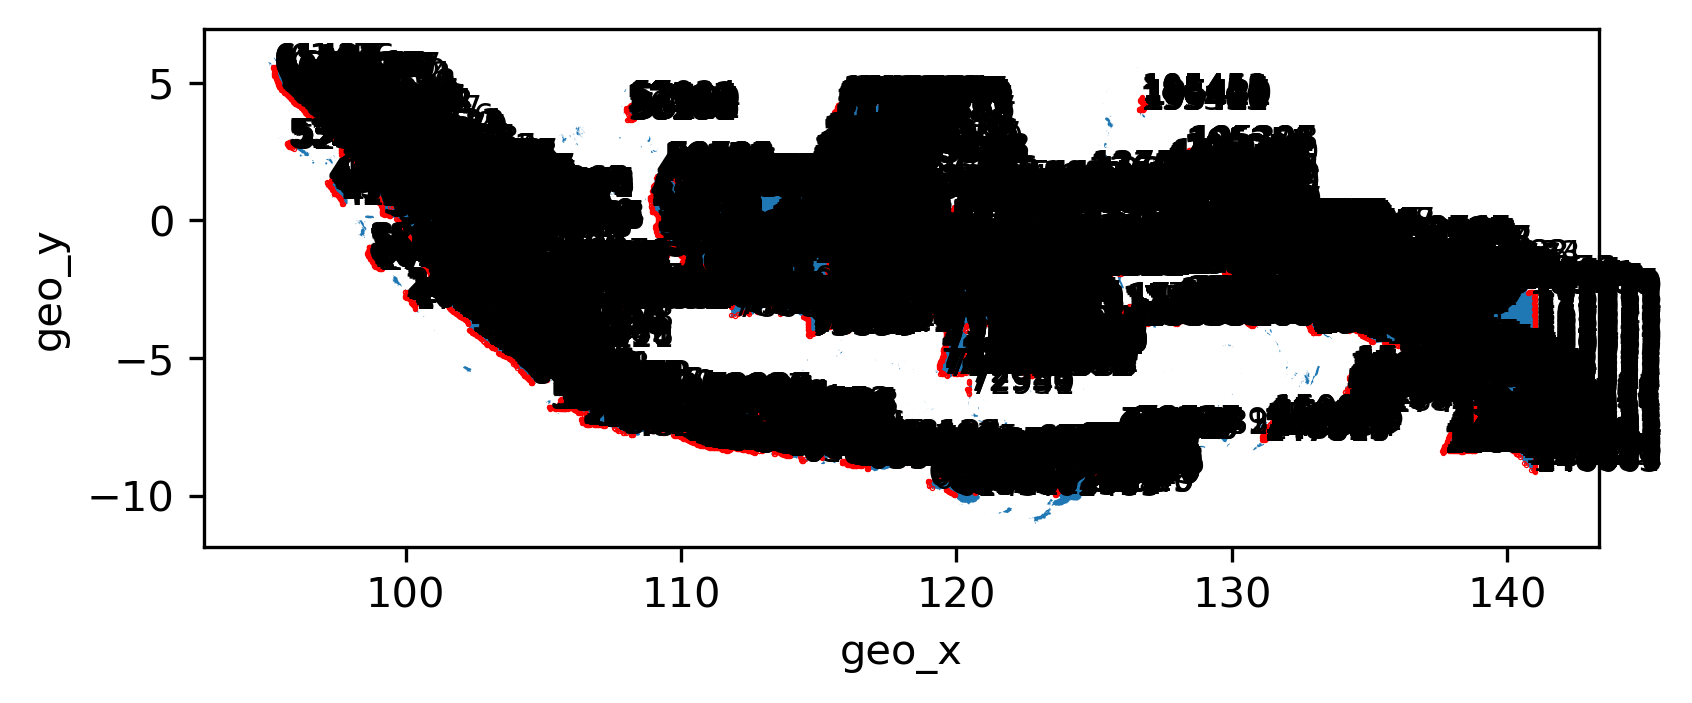

In [78]:
fig = plt.figure()
ax = plt.subplot(111)
indonesia.plot(ax=ax) # plot indonesia
# concessions.plot(ax=ax, color="yellow") # plot concession regions
# grid.plot.scatter(x='geo_x', y='geo_y', s=0.08,ax=ax, color="red") # plot grid coordinates
filtered.plot.scatter(x='geo_x', y='geo_y', s=0.08,ax=ax, color="red") # plot grid coordinates


plt.axis('scaled')
# plt.show()

# # label concessions
# concessions['coords'] = concessions['geometry'].apply(lambda x: x.representative_point().coords[:])
# concessions['coords'] = [coords[0] for coords in concessions['coords']]

# for idx, row in concessions.iterrows():
#     plt.annotate(text=concessions.index[idx], xy=row['coords'],
#                  horizontalalignment='center', fontsize=10)

# geo_x	longitude
# geo_y	latitude
# 3 km latitude = 3 / 110.574 deg
# 3 km longitutde = 3 / (111.320*cos(latitude)) deg
# grid_squares = []
# for i in range(len(grid)):
#     x, y = grid['geo_x'][i], grid['geo_y'][i]
#     grid_squares.append(Polygon([(x, y), (x, y+3/110.574), (x+3/(111.320*np.cos(y)), y+3/110.574), (x+3/(111.320*np.cos(y)), y)]))

# grid['geometry'] = grid_squares
# for square in grid_squares:
    # plt.plot(*square.exterior.xy, ax=ax)

# label grid points
# for i in range(len(grid)):
#     plt.annotate(text=grid["id"][i], xy=(grid['geo_x'][i], grid['geo_y'][i]), fontsize=8)

    
# label filtered grid points
for i in range(len(filtered)):
    plt.annotate(text=filtered['id'].iloc[i,], xy=(filtered['geo_x'].iloc[i,], filtered['geo_y'].iloc[i,]), fontsize=8)

# concessions.plot()
plt.show()

In [11]:
import random
import pandas as pd
mock_grid = pd.DataFrame()
mock_grid["id"] = [i for i in range(15)]
mock_grid["cellcode"] = [i for i in range(15)]
mock_grid['geo_x'] = sorted([1, 3, 5, 7, 9] * 3)
mock_grid['geo_y'] = [1, 3, 5] * 5
mock_grid["area"] = [4] * 15
mock_grid["slope"] = random.choices(range(10), k=15)
mock_grid["elev"] = random.choices(range(50, 100), k=15)
mock_grid["distroad"] = random.choices(range(20), k=15)
mock_grid["distcapital"] = random.choices(range(50, 100), k=15)
mock_grid["peatdepth"] = random.choices(range(100), k=15)
mock_grid["biomasscarbonruesch"] = random.choices(range(100), k=15)
mock_grid["biomasscarbonbaccini"] = random.choices(range(100), k=15)
mock_grid["soilcarbon"] = random.choices(range(100), k=15)
for i in range(10):
    mock_grid['defor200'+str(i)]=[random.uniform(0, 5) for _ in range(15)]

mock_grid.to_csv("mock/mock_grid.csv")

In [2]:
# imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import descartes
from shapely.geometry import Polygon

In [3]:
oil_conc = gpd.read_file("data/Greenpeace_Indonesia_Oil_Palm_Concessions_Map_Nov_2020.shp")
log_conc = gpd.read_file("data/Managed_Forest_Concessions_(WRI).geojson")

In [31]:
oil_companies = list(set(oil_conc['PO_COM']))
log_companies = list(set(log_conc['name']))
for i, co in enumerate(log_companies):
    if '. ' in co:
        co = co.replace('. ', ' ')
    elif '.' in co:
        co = co.replace('.', ' ')
    log_companies[i] = co.lower().strip()
for i in range(len(oil_companies)):
    oil_companies[i] = oil_companies[i].lower().strip()


In [33]:
pd.DataFrame({'oilpalm':oil_companies}).to_csv('data/oilpalmconcessions_companies.csv')
pd.DataFrame({'logging':log_companies}).to_csv('data/loggingconcessions_companies.csv')

In [34]:
set(oil_companies).intersection(log_companies)

{'pt harapan kaltim lestari',
 'pt hasnur jaya utama',
 'pt rimba karya rayatama'}

In [57]:
mat = np.array([[1,2,3],[4,5,6], [7,8,9]])
ind = np.array([[1,0,1], [0,0,0], [1,0,1]])

mat*ind

array([[1, 0, 3],
       [0, 0, 0],
       [7, 0, 9]])

In [78]:
dim = 4
years = [2000, 2001, 2001, 2002]
skip2001 = set([i for i in range(len(years)) if years[i] > 2001])
print(skip2001)
skip = [3]
ind = [[1]*dim for _ in range(dim)]
for i in range(dim):
    for j in range(dim):
        if i in skip2001 or j in skip2001:
            ind[i][j] = 0
print(ind)



{3}
[[1, 1, 1, 0], [1, 1, 1, 0], [1, 1, 1, 0], [0, 0, 0, 0]]


In [4]:
oil_conc

,PROVINCE,LEGAL_STAT,HGU,AREA_HGU,SOURCES,PELEPASAN,AREA_LEPAS,IJIN_LOKAS,AREA_ILOK,AREA_IUP,HECTARES,PERIMETER,AREA,PO_COM,IUP,commodity,PO_GROUP,DISTRICT,LIC_PROCES,geometry
0,Riau,no data,None,0.00,Riau Province 2013 revised by RSPO 2014,None,0.0,None,0.0,0.0,140.004217,10240.888534,1.399089e+06,PT Meganusa Intisawit,None,Palm oil,Wijaya family/Sinar Mas/GAR,Indragiri Hulu,None,"POLYGON ((102.24370 -0.63033, 102.24369 -0.630..."
1,Riau,no data,None,0.00,Riau Province 2013 revised by RSPO 2014,None,0.0,None,0.0,0.0,12.515122,2079.911111,1.250660e+05,PT Meganusa Intisawit,None,Palm oil,Wijaya family/Sinar Mas/GAR,Indragiri Hulu,None,"POLYGON ((102.36326 -0.58118, 102.36326 -0.581..."
2,Riau,no data,None,0.00,Riau Province 2013 revised by RSPO 2014,None,0.0,None,0.0,0.0,37.724752,3757.655140,3.769906e+05,PT Meganusa Intisawit,None,Palm oil,Wijaya family/Sinar Mas/GAR,Indragiri Hulu,None,"POLYGON ((102.35687 -0.58801, 102.35672 -0.587..."
3,Riau,no data,None,0.00,Riau Province 2013 revised by RSPO 2014,None,0.0,None,0.0,0.0,2364.272233,42612.259813,2.362662e+07,PT Meganusa Intisawit,None,Palm oil,Wijaya family/Sinar Mas/GAR,Indragiri Hulu,None,"POLYGON ((102.25815 -0.70225, 102.25803 -0.702..."
4,Riau,no data,None,0.00,RSPO 2014,None,0.0,None,0.0,0.0,5107.131318,112468.017002,5.103654e+07,PT Meganusa Intisawit,None,Palm oil,Wijaya family/Sinar Mas/GAR,Indragiri Hulu,None,"POLYGON ((102.37983 -0.55201, 102.38133 -0.553..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12254,North Sumatra,HGU,154/HGU/BPN/2004 date 11/11/2004,2301.88,Geo RSPO online map 2020 and BPN online map 2019,None,0.0,None,0.0,0.0,1812.746279,30831.899361,1.811512e+07,PT Inti Indosawit Subur (KPM Plantation),None,Palm oil,Tanoto family/Royal Golden Eagle (RGE)/Asian Agri,Asahan,None,"POLYGON ((99.59750 2.79437, 99.59769 2.79418, ..."
12255,Riau,no data,None,0.00,MoEF 2013,401/KPTS-II/1996 (?),3370.0,None,0.0,0.0,3063.703883,31508.040303,3.061618e+07,PT Perkebunan Nusantara II (S. Air Bayas),None,Palm oil,Perkebunan Nusantara,Indragiri Hilir and Indragiri Hulu,None,"POLYGON ((102.66649 -0.37921, 102.67776 -0.385..."
12256,Riau,no data,None,0.00,MoEF 2013,401/KPTS-II/1996 (?),3370.0,None,0.0,0.0,0.001011,997.911047,1.010375e+01,PT Perkebunan Nusantara II (S. Air Bayas),None,Palm oil,Perkebunan Nusantara,Indragiri Hilir and Indragiri Hulu,None,"POLYGON ((102.61391 -0.37831, 102.61091 -0.375..."
12257,Riau,no data,None,0.00,MoEF 2013,401/KPTS-II/1996 (?),3370.0,None,0.0,0.0,0.005392,76.041975,5.388750e+01,PT Perkebunan Nusantara II (S. Air Bayas),None,Palm oil,Perkebunan Nusantara,Indragiri Hilir and Indragiri Hulu,None,"POLYGON ((102.61391 -0.37831, 102.61395 -0.378..."
